<a href="https://colab.research.google.com/github/ShmatArtem/TMSds/blob/main/HW19_Shmat_Artem_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df = pd.read_csv('credit.csv')
df.head()

<ipython-input-2-726310acf522>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
#Всего клиентов
df['Customer_ID'].nunique()

12500

In [4]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
df_n = df.drop(['ID', 'Month', 'Name', 'Type_of_Loan',
       'Delay_from_due_date',  'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month','Payment_Behaviour', 'SSN'], axis= 1)

In [6]:
df_n['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [7]:
df_n.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
count,84998.000000,100000.000000,100000.00000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040
std,3183.686167,117.404834,129.05741,466.422621
min,303.645417,-1.000000,0.00000,1.000000
25%,1625.568229,3.000000,4.00000,8.000000
50%,3093.745000,6.000000,5.00000,13.000000
75%,5957.448333,7.000000,7.00000,20.000000
max,15204.633333,1798.000000,1499.00000,5797.000000


In [8]:
df_n.sample(10)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
14339,CUS_0xbdc2,186,Developer,172891.36,14156.613333,3,7,1,3,-2,922.15,27 Years and 1 Months,1342.5266128366654,80.32249464797974,Good
28368,CUS_0x9466,50,Doctor,61269.16,5295.763333,6,4,9,2,NaN,389.91,19 Years and 2 Months,141.30554988266587,582.6769946850486,Standard
15782,CUS_0x83f,34,Engineer,10333.895,657.157917,3,6,20,4,15,70.46,10 Years and 5 Months,27.375693135514013,306.886757995295,Standard
64825,CUS_0xb8e9,40,Developer,37443.81,NaN,5,2,2,3,2,1110.5,22 Years and 3 Months,54.92730794797981,401.3400593080058,Good
79966,CUS_0x27ad,37,_______,60255.9,NaN,5,3,16,1,11,1364.56,20 Years and 5 Months,222.00329582137752,542.944379590278,Standard
37132,CUS_0x4db5,15,Engineer,46417.56_,3606.130000,6,7,29,5,16,4419.23,13 Years and 3 Months,261.154655208471,218.8406561142553,Poor
36116,CUS_0xba51,24,Scientist,170751.96_,14415.330000,3,4,6,4,2,1076.56,32 Years and 8 Months,NaN,NaN,Good
91930,CUS_0xbf1d,23,Scientist,20434.15,1694.845833,7,6,8,4,14,1393.23,17 Years and 3 Months,82.5923327032669,285.4429888789169,Standard
31004,CUS_0x7d82,23,Lawyer,19134.77,1809.564167,8,5,24,7,NaN,1870.49,8 Years and 3 Months,211.57857797208302,193.21941739113686,Poor
69837,CUS_0x96c7,45,Engineer,32507.89,2784.990833,7,6,10,-100,11,1301.81,21 Years and 10 Months,223.62680219906034,247.4385757440337,Poor


Как видно, в данных есть ошибки и много пропусков. Также есть колонка с категориальным признаком (Occupation). Целесообразнее, кажется, применить label encoder, поскольку для использования hot-one encoder слишком много классов (16 лишних столбцов появилось бы)

Scientist:6299
_______:7062
Teacher:6215
Engineer:6350
Entrepreneur:6174
Developer:6235
Lawyer:6575
Media_Manager:6232
Doctor:6087
Journalist:6085
Manager:5973
Accountant:6271
Musician:5911
Mechanic:6291
Writer:5885
Architect:6355
Количество уникальных значений: 16
Количество пустых значений: 0


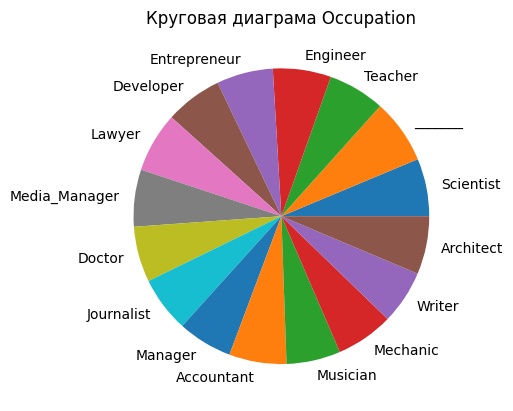

In [9]:
# проверим, сколько представителей каждой профессии есть в датасете
occ = df_n['Occupation'].unique()
amount = 0
pie = []

for i in occ:
  n = df_n['Occupation'][df.Occupation == i].count()

  pie.append(n)

  amount += n
  print(f'{i}:{n}')

print('Количество уникальных значений:', df_n['Occupation'].nunique())
print('Количество пустых значений:', df_n['Occupation'][df.Occupation.isna()].count())

plt.pie(pie, labels = occ)
plt.title('Круговая диаграма Occupation')
plt.show()

Идеальное соотношение. Уберём "_____" профессию и применим label encoder.

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
df = df_n.loc[df_n.Occupation != '_______']

occ_new = label_encoder.fit_transform(df.Occupation)

df['Occupation'] = occ_new

In [12]:
# Соответсвие професcии и класса
table = pd.DataFrame()

table['Occupation'] = label_encoder.classes_
table['Class'] = range(15)

table

,Occupation,Class
0,Accountant,0
1,Architect,1
2,Developer,2
3,Doctor,3
4,Engineer,4
5,Entrepreneur,5
6,Journalist,6
7,Lawyer,7
8,Manager,8
9,Mechanic,9


Как видно ниже, с возрастом здесь тоже беда - много значений с "_" и больше 100

In [ ]:
ages = df['Age'].unique()

count = []
print('Возраст', "Количество раз")
for i in ages:
  n = df['Age'][df.Age == i].count()

  count.append(n)


  print(f'{i}:{n}')


In [ ]:
# Уберём "_" в возрасте и приведем всё к int
for age in ages:
  if '_' in age:
    new_age = age.replace('_', '')
    df['Age'] = df['Age'].replace(age, int(new_age))
  else:
    df['Age'] = df['Age'].replace(age, int(age))

In [15]:
# Отберём действительные значения возраста
df = df[(df.Age > 14) & (df.Age < 100)]

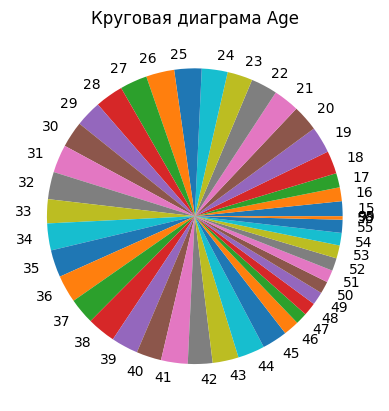

In [16]:
ages = df['Age'].unique()
ages.sort()
count = []

for i in ages:
  n = df['Age'][df.Age == i].count()

  count.append(n)

plt.pie(count, labels= ages)
plt.title('Круговая диаграма Age')
plt.show()

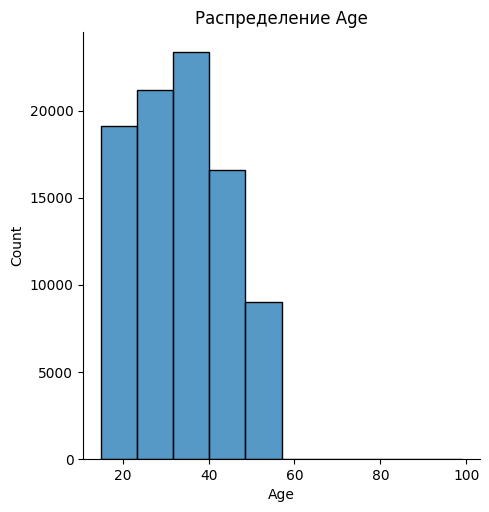

In [17]:
import seaborn as sns

sns.displot(df['Age'], bins = 10)

plt.title('Распределение Age')
plt.show()

Почти все значения в датафрейме нуждаются в похожей обработке, поэтому создадим такую функцию и применим её ко всем колонкам

In [18]:
def transform_func(column_name):
  """This function removes all "_" from the pd.Series objects and fills NA's with mean value of this series.
  Also function converts object's elements into float.

  Args:
  pd.Series

  Returns:
  None"""

  for el in df[column_name]:

    if type(el) == float or type(el) == int:
      pass

    elif '_' in el:
      new_el = float(el.replace('_', ''))
      df[column_name] = df[column_name].replace(el, new_el)

  df[column_name] = df[column_name].apply(float)

  mean_value = df[column_name].mean()

  df[column_name] = df[column_name].fillna(mean_value)

In [19]:
columns = ['Annual_Income','Monthly_Inhand_Salary',
        'Outstanding_Debt', 'Amount_invested_monthly',	'Monthly_Balance']

for i in columns:
  transform_func(i)

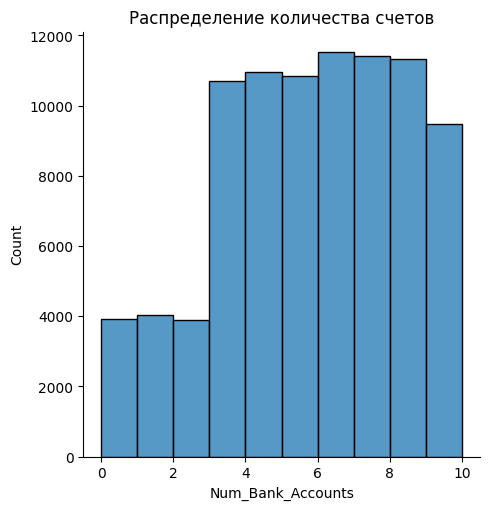

In [20]:
# Оставим реальные значения Num_Bank_Account
df = df.loc[df.Num_Bank_Accounts <= 10]
df = df.loc[df.Num_Bank_Accounts >= 0]

sns.displot(df['Num_Bank_Accounts'], bins=10)
plt.title('Распределение количества счетов')
plt.show()

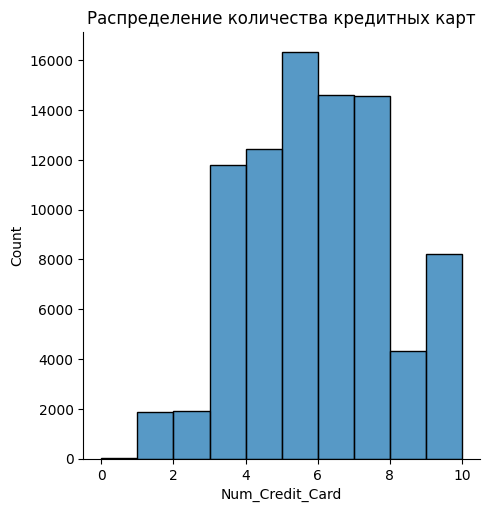

In [21]:
# Оставим реальные значения Num_Credit_Card
df = df.loc[df.Num_Credit_Card <= 10]

sns.displot(df['Num_Credit_Card'], bins=10)
plt.title('Распределение количества кредитных карт')
plt.show()

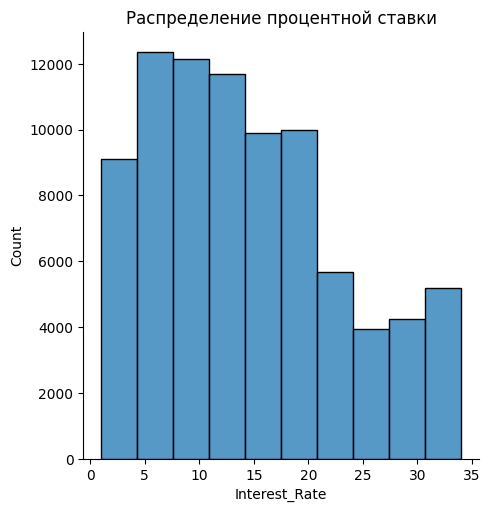

In [22]:
# Оставим реальные значения Interest_Rate
df = df.loc[df.Interest_Rate <= 35]

sns.displot(df['Interest_Rate'], bins=10)
plt.title('Распределение процентной ставки')
plt.show()

Осталось обработать:   
Num_of_Loan, Num_of_Delayed_Payment, Credit_History_Age

In [23]:
def transform_func_int(column_name):
  """This function removes all "_" from the pd.Series objects.
  Also function converts object's elements into int.

  Args:
  pd.Series

  Returns:
  None"""

  for el in df[column_name]:

    if type(el) == float or type(el) == int:
      pass

    elif '_' in el:
      new_el = int(el.replace('_', ''))
      df[column_name] = df[column_name].replace(el, new_el)

  df[column_name] = df[column_name][df[column_name].isna() == False].apply(int)

In [24]:
transform_func_int('Num_of_Loan')

df['Num_of_Loan'] = df['Num_of_Loan'][df.Num_of_Loan < 10]
df['Num_of_Loan'] = df['Num_of_Loan'][df.Num_of_Loan >= 0]

In [25]:
# Заменим пропущенные значения Num_of_Loan на 3
print(f"median: {df['Num_of_Loan'].median()}")
print(f"mean: {df['Num_of_Loan'].mean()}")

df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())

median: 3.0
mean: 3.5187850513673133


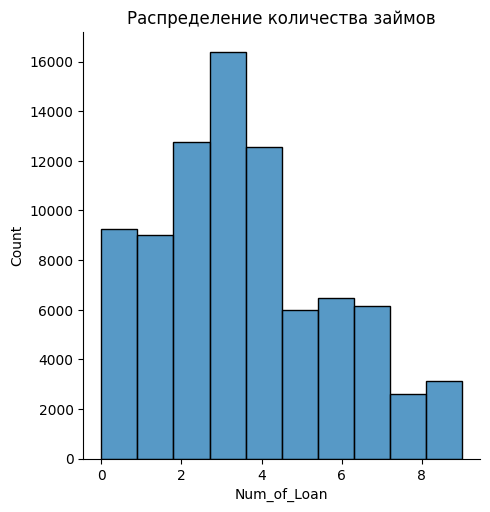

In [26]:
sns.displot(df['Num_of_Loan'], bins=10)
plt.title('Распределение количества займов')
plt.show()

In [ ]:
# Посмотрим, какие значения принимает Num_of_Delayed_Payment
df['Num_of_Delayed_Payment'].unique()

In [28]:
transform_func_int('Num_of_Delayed_Payment')

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'][df.Num_of_Delayed_Payment < 30]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'][df.Num_of_Delayed_Payment > 0]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

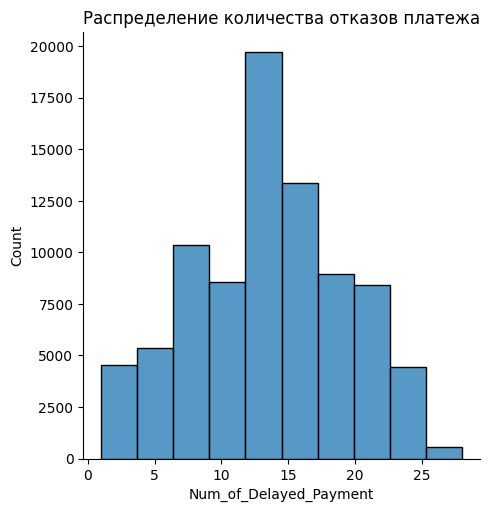

In [29]:
sns.displot(df['Num_of_Delayed_Payment'], bins=10)
plt.title('Распределение количества отказов платежа')
plt.show()

In [ ]:
# Посмотрим, какие значения лежат в Credit_History_Age
df['Credit_History_Age'].unique()

In [31]:
# Преобразуем эти объекты в количество месяцев int
import re

def years_func(line):

    if type(line) == str:

      years, months = re.findall(r'\b\d+\b', line)

      age = int(years)*12 + int(months)

      return age

In [32]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(years_func)

In [33]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())

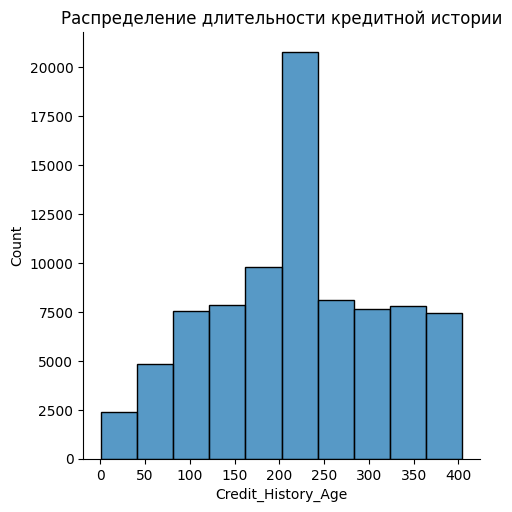

In [34]:
sns.displot(df['Credit_History_Age'], bins=10)
plt.title('Распределение длительности кредитной истории')
plt.show()

In [35]:
df.isna().sum()

Customer_ID                0
Age                        0
Occupation                 0
Annual_Income              0
Monthly_Inhand_Salary      0
Num_Bank_Accounts          0
Num_Credit_Card            0
Interest_Rate              0
Num_of_Loan                0
Num_of_Delayed_Payment     0
Outstanding_Debt           0
Credit_History_Age         0
Amount_invested_monthly    0
Monthly_Balance            0
Credit_Score               0
dtype: int64

In [36]:
# Теперь приведём в численный вид целевой показатель Credit_Score
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [37]:
for index, row in df.iterrows():
    if row['Credit_Score'] == 'Poor':
        df.loc[index, 'Credit_Score'] = 0

    elif row['Credit_Score'] == 'Standard':
        df.loc[index, 'Credit_Score'] = 1

    else:
        df.loc[index, 'Credit_Score'] = 2

Теперь когда все пропуски заполнены, данные приведены в численный вид и т.п., можем сгруппировать их по ID клиента, чтобы избежать повтора данных

In [38]:
df = df.groupby('Customer_ID').mean()
df['Credit_Score'] = df['Credit_Score'].apply(round)

df.reset_index(drop= True , inplace= True )
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,17.375000,7.0,30625.940,2894.258105,6.0,5.0,27.0,2.000000,25.000000,1562.91,125.500000,158.549735,3.353753e+02,0
1,25.714286,9.0,52312.680,4250.390000,6.0,5.0,17.0,3.857143,17.285714,202.68,347.142857,146.091298,4.262955e+02,1
2,18.500000,10.0,113781.390,8882.426334,1.0,4.0,1.0,0.000000,7.375000,1030.20,191.000000,1708.491411,7.812298e+02,0
3,43.875000,3.0,58918.470,5084.130084,3.0,3.0,17.0,3.000000,14.375000,473.14,186.500000,1522.178300,3.326428e+02,1
4,43.750000,9.0,98620.980,6555.609314,3.0,3.0,6.0,3.000000,9.125000,1233.51,211.625000,355.442408,4.727810e+02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12400,55.000000,12.0,17032.785,1176.398750,0.0,6.0,2.0,3.000000,8.400000,1229.08,206.400000,80.348860,2.759913e+02,2
12401,36.857143,5.0,25546.260,2415.855000,8.0,7.0,14.0,5.000000,12.000000,758.44,221.428571,131.697470,2.785594e+02,1
12402,18.625000,3.0,117639.920,9727.326667,5.0,6.0,1.0,2.000000,5.250000,338.30,295.500000,1820.872668,-3.781219e+21,1
12403,17.285714,11.0,60877.170,5218.097500,6.0,8.0,27.0,8.000000,15.857143,1300.13,172.857143,156.172974,3.485419e+02,0


<Axes: >

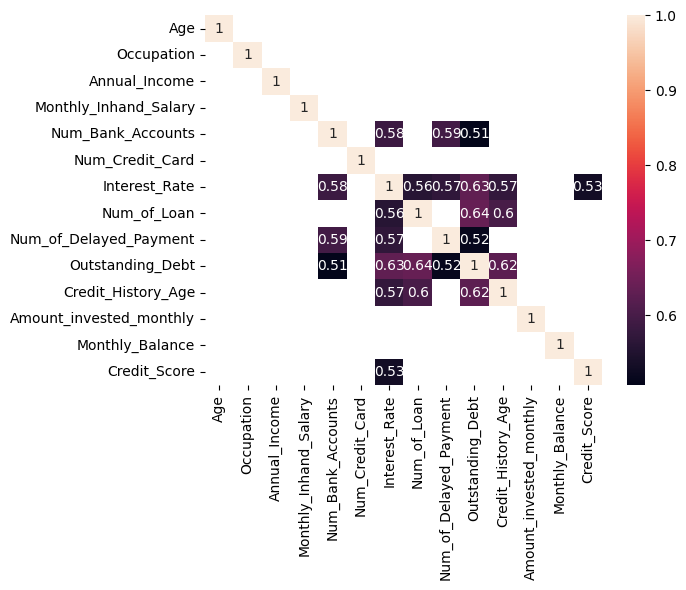

In [39]:
data = df.corr().abs()
sns.heatmap(data = data[data > 0.5], annot = True)

In [40]:
# Резервная копия
df_copy = df
df.to_csv('credit_cleared.csv', header=True)

В целом, данные хорошие, нет корреляций с целевым признаком. Единтсвенное замечани это Interest_Rate, есть небольшие корреляции с другими фичами, но не знаю как лучше поступить: откинуть или нет. Лучше оставлю, так как корреляция не такая уж высокая (почти всё <0.6)


Теперь построим модели классификации данных по признаку Credit_Score.

LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [ ]:
df_binary = df[(df.Credit_Score == 0) | (df.Credit_Score == 2)]

def one_two_func(x):
  if x == 2:
    return 1
  else:
    return 0

temp = df_binary['Credit_Score'].apply(one_two_func)
df_binary['Credit_Score'] = temp

Accuracy score: 0.8587962962962963
F-1 score: 0.820763956904995


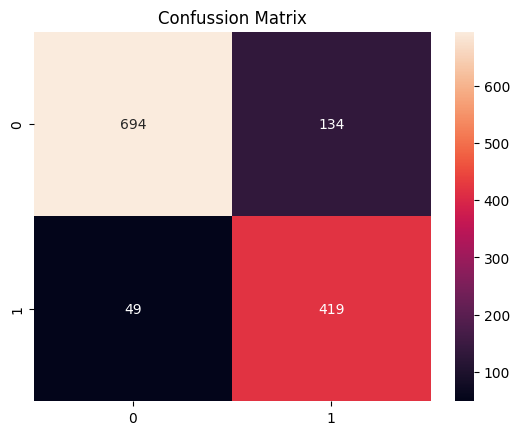

In [43]:
log_regr = LogisticRegression(max_iter = 1000)

X = df_binary.drop('Credit_Score', axis = 1)
y = df_binary['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log_regr.fit(X_train, y_train)

y_pred = log_regr.predict(X_test)

accuracy = []
f1_score_list = []

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {f1_score(y_test, y_pred)}")

plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')
plt.show()

SVM Classification

Accuracy score: 0.8541666666666666
F-1 score: 0.8254847645429364


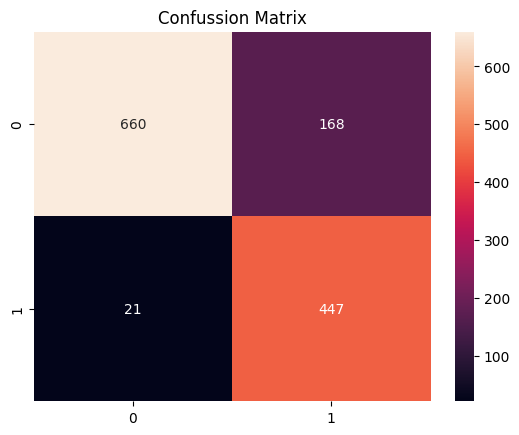

In [44]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {f1_score(y_test, y_pred)}")

plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')
plt.show()

Decision Tree Classifier

Accuracy score: 0.8541666666666666
F-1 score: 0.967948717948718


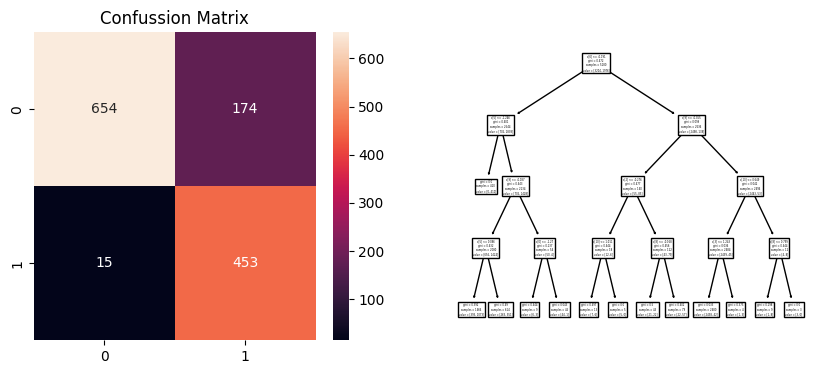

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(max_depth = 4)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {recall_score(y_test, y_pred)}")

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')

plt.subplot(1,2,2)
plot_tree(tree)
plt.show()

Random Forest Classification

In [ ]:
pip install optuna

In [47]:
import optuna
import logging

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 200, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 10)

    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = 1 - accuracy_score(y_test, y_pred)

    return acc

optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study()
study.optimize(objective, n_trials=100)

best = study.best_params

Accuracy score: 0.8587962962962963
F-1 score: 0.938034188034188


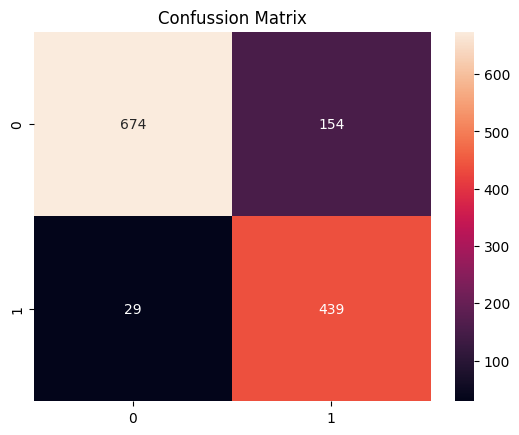

In [48]:
# Используем полученные гиперпараметры в обучение леса
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators= best['n_estimators'] ,max_depth= best['max_depth'])

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {recall_score(y_test, y_pred)}")

plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')
plt.show()

Neural Network Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

model_nn = tf.keras.Sequential([
    keras.layers.Dense(14, activation=tf.nn.relu),
    keras.layers.Dense(28, activation=tf.nn.relu),
    keras.layers.Dense(18, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
model_nn.compile(optimizer = 'adam', loss = loss, metrics=['accuracy'])

history = model_nn.fit(X_test, y_test, epochs = 150)

train_loss, train_acc = model_nn.evaluate(X_train, y_train)
print(f'Loss: {train_loss}, Accuracy: {train_acc}')

y_pred = model_nn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))


Accuracy score: 0.970679012345679
F-1 score: 0.9786324786324786


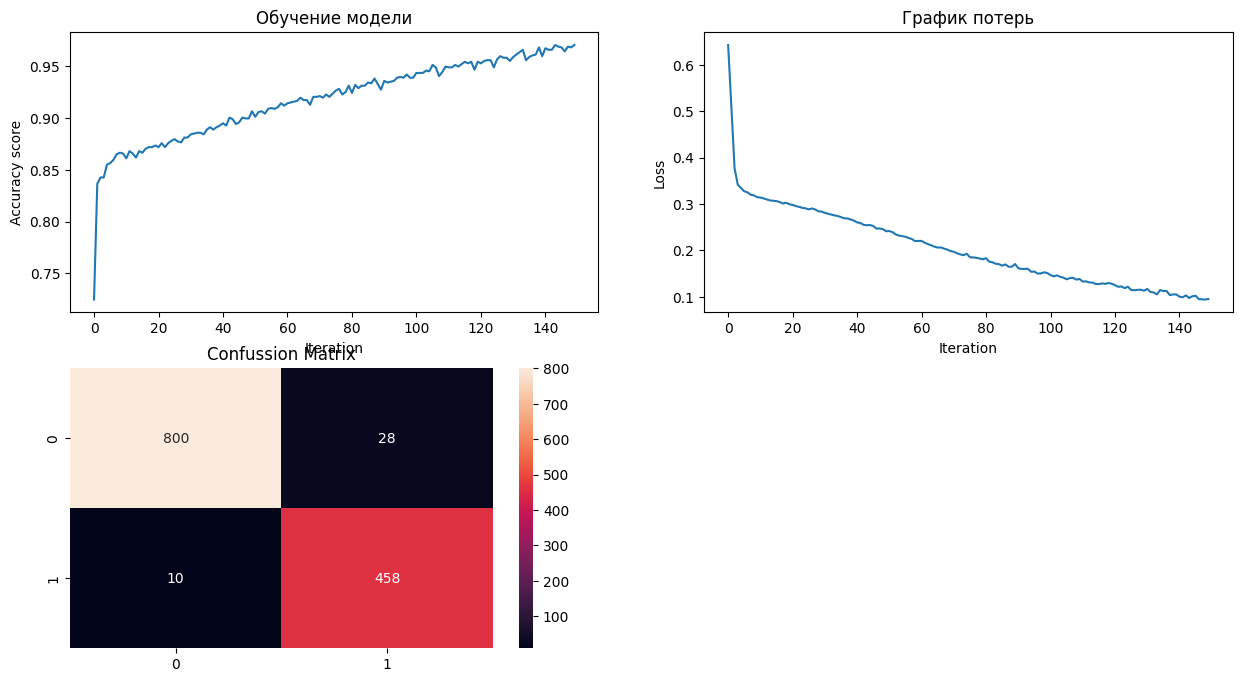

In [50]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {recall_score(y_test, y_pred)}")

plt.figure(figsize = (15, 8))

plt.subplot(2,2,1)
plt.plot(history.history["accuracy"])
plt.xlabel('Iteration')
plt.ylabel('Accuracy score')
plt.title('Обучение модели')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('График потерь')

plt.subplot(2,2,3)
plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')
plt.show()

plt.show()

XGBoost для задачи бинарной классификации

In [51]:
import xgboost as xgb

def objective_xgb(trial):


    n_estimators = trial.suggest_int('n_estimators', 200, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 5)

    xgb_model = xgb.XGBClassifier(max_depth=max_depth, n_estimators = n_estimators)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    acc = 1 - accuracy_score(y_test, y_pred)

    return acc

optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study()
study.optimize(objective, n_trials=100)

best_xgb = study.best_params

Accuracy score: 0.8449074074074074
F-1 score: 0.8461538461538461


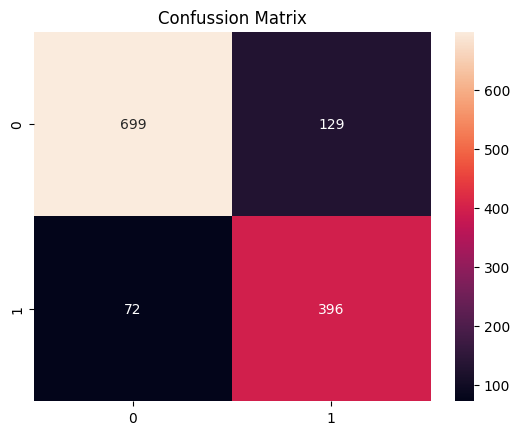

In [52]:
xgb_model = xgb.XGBClassifier(max_depth=best_xgb['max_depth'], n_estimators = best_xgb['n_estimators'])
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"F-1 score: {recall_score(y_test, y_pred)}")

plt.title('Confussion Matrix')
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(data = conf_m, annot = True, fmt = 'g')
plt.show()

In [104]:
name = ['Logistic Regression', 'SVM Classifier', 'Decision Tree', 'Random Forest', 'Neural Network', 'XGBoost']

metrics = pd.DataFrame({
    'accuracy': accuracy,
    'f1_score': f1_score_list,
})

metrics.index = name

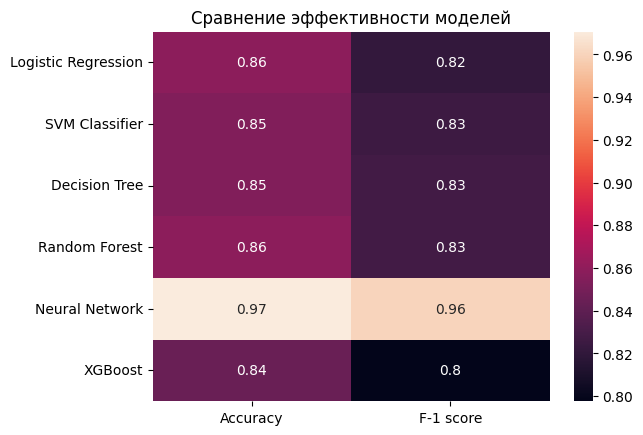

In [98]:
sns.heatmap(data = metrics[['accuracy', 'f1_score']], annot = True, xticklabels=['Accuracy','F-1 score'],yticklabels=name)
plt.title('Сравнение эффективности моделей')
plt.show()

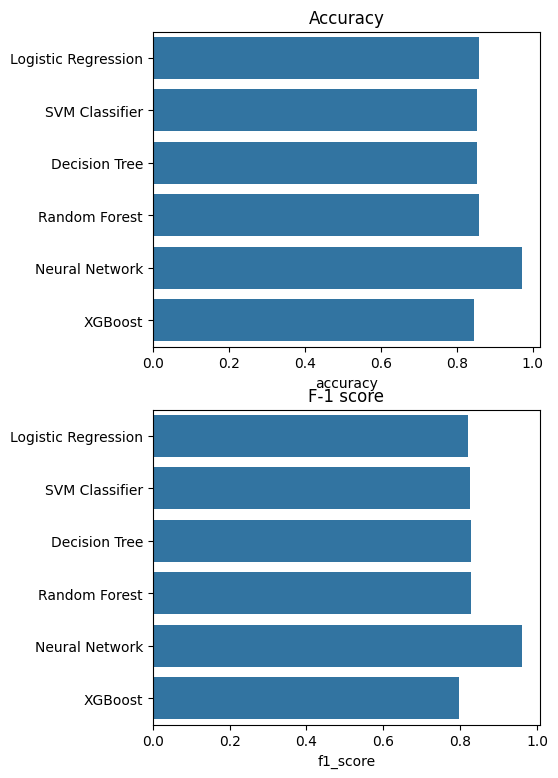

In [122]:
plt.figure(figsize = (5,9))

plt.subplot(2,1,1)
sns.barplot(metrics['accuracy'], orient = 'y')
plt.title('Accuracy')

plt.subplot(2,1,2)
sns.barplot(metrics['f1_score'], orient = 'y')
plt.title('F-1 score')

plt.show()

Как видно из диаграмм, лучше всего с задачей классификации справилась Нейронная сеть (точность 97 %), остальные модели на одном уровне (точность 85-86% процентов). Хуже всего с этими данными справился XGBoost (точность 84%).